# CNN Project

## Downloading dataset from kaggle and saving into google drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # Downloading Dataset from kaggle using API
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp /content/drive/MyDrive/Datasets/CNN_Project/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download grassknoted/asl-alphabet

# # Copy the downloaded dataset to Google Drive
# !cp /content/asl-alphabet.zip /content/drive/MyDrive/Datasets/CNN_Project

In [3]:
# # unzipping the dataset
# !unzip /content/drive/MyDrive/Datasets/CNN_Project/asl-alphabet.zip -d /content/drive/MyDrive/Datasets/CNN_Project/Data

## Loading Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Visualizing Data

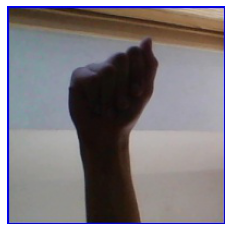

In [5]:
# img = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/Datasets/CNN_Project/Data/asl_alphabet_train/asl_alphabet_train/A/A1.jpg")
# plt.imshow(img)
# plt.axis("off")
# plt.show()

In [6]:
# img = tf.keras.preprocessing.image.img_to_array(img)
# print(f"Shape of the image : {img.shape}")

Shape of the image : (200, 200, 3)


In [5]:
image_width, image_height, image_channels = (200, 200, 3)

## Loading Data using Datagenerator

In [2]:
# Path of the dataset
# train_path = '/content/drive/MyDrive/Datasets/CNN_Project/Data/asl_alphabet_train/asl_alphabet_train'
# test_path = '/content/drive/MyDrive/Datasets/CNN_Project/Data/asl_alphabet_test/asl_alphabet_test'
train_path = "/home/vb/Documents/Aegis/Deep Learning/Project/ASL/asl_alphabet_train/asl_alphabet_train"

In [3]:
# Intantiating the objects for data generator
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# test_dataset = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [6]:
# Loading training data
train_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (image_width,image_height),
    batch_size = 32,
    class_mode = 'categorical'
    )

Found 87000 images belonging to 29 classes.


In [6]:
train_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [7]:
number_of_classes = 29

## CNN

### Building Architecture

In [8]:
cnn = tf.keras.Sequential([
                           # Input layer
                           tf.keras.layers.InputLayer(input_shape = (image_width, image_height, image_channels)),
                           
                           # 1 Convolution, Convolution and Maxipoolig layer
                           tf.keras.layers.Conv2D(32, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.Conv2D(32, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.MaxPooling2D(3, 3),

                           # 2 Convolution, Convolution and Maxipoolig layer
                           tf.keras.layers.Conv2D(64, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.Conv2D(64, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.MaxPooling2D(3, 3),

                           # 3 Convolution, Convolution and Maxipoolig layer
                           tf.keras.layers.Conv2D(128, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.Conv2D(128, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.MaxPooling2D(3, 3),

                           # 4 Convolution and Convolution layer
                           tf.keras.layers.Conv2D(256, 3, 1, 'same', activation= 'relu'),
                           tf.keras.layers.Conv2D(256, 3, 1, 'same', activation= 'relu'),

                           # Flattening layer    
                           tf.keras.layers.Flatten(),

                           # Fully connected layer 1 with Dropout  
                           tf.keras.layers.Dense(512),
                           tf.keras.layers.Dropout(0.2),

                           # Output layer
                           tf.keras.layers.Dense(number_of_classes, 'softmax')
                           ])

# optimizer = tf.keras.optimizers.Adam()
optimizer = tf.keras.optimizers.SGD(nesterov=True)
cnn.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 66, 66, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)       7

### Training

In [9]:
cnn.fit(train_set, batch_size=128, epochs=1, workers=14)

2719/2719 [==============================] - 8137s 3s/step - loss: 2.3226 - accuracy: 0.3264


In [10]:
cnn.save("my_model_SGD")

INFO:tensorflow:Assets written to: my_model_SGD/assets


In [12]:
cnn.fit(train_set, batch_size=128, epochs=3, workers=16, initial_epoch = 1)

Epoch 2/3
2719/2719 [==============================] - 7872s 3s/step - loss: 0.1517 - accuracy: 0.9525
Epoch 3/3
2719/2719 [==============================] - 7537s 3s/step - loss: 0.0389 - accuracy: 0.9888


In [13]:
cnn.save("my_model_SGD_3_Epochs")

INFO:tensorflow:Assets written to: my_model_SGD_3_Epochs/assets


In [14]:
cnn.fit(train_set, batch_size=128, epochs=4, workers=16, initial_epoch = 3)

Epoch 4/4
2719/2719 [==============================] - 7557s 3s/step - loss: 0.0162 - accuracy: 0.9956


In [15]:
cnn.save("my_model_SGD_4_Epochs")

INFO:tensorflow:Assets written to: my_model_SGD_4_Epochs/assets


In [13]:
model = tf.keras.models.load_model("my_model_SGD_4_Epochs")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 66, 66, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)       7

In [6]:
temp_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5,
             'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11,
             'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17,
             'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23,
             'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
class_dict = {i[1]:i[0] for i in temp_dict.items()}

In [8]:
cnn = tf.keras.models.load_model("my_model_SGD_4_Epochs")
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 66, 66, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)       7

In [9]:
cnn.fit(train_set, batch_size=128, epochs=1, workers=16)

1820/2719 [===================>..........] - ETA: 49:28 - loss: 0.6183 - accuracy: 0.8297

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/vb/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-3ae2d758afd8>", line 1, in <module>
    cnn.fit(train_set, batch_size=128, epochs=1, workers=16)
  File "/home/vb/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/vb/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "/home/vb/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 917, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/home/vb/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/function.py", line 3039, in __call__
    return graph_function._call_flat(
  File "/home/vb/anaconda3

TypeError: object of type 'NoneType' has no len()

In [ ]:
cnn.save("my_model_SGD_5_Epochs")